# 导入数据

In [85]:
import pandas as pd 
from collections import Counter

In [86]:
wanhui = pd.read_csv('../data/晚会信息.csv',encoding='gbk')
jiemu = pd.read_excel('../data/节目单.xlsx')

display(wanhui.head())
display(jiemu.head())

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,中文名,外文名,别名,国家/地区,类型,主持人,制作公司,首播时间,播出频道,播出时间,导演,播出状态,在线播放平台,届数
0,1983年中央电视台春节联欢晚会,1983 CCTV Spring Festival Gala,1983央视猪年春晚,['中国大陆'],['文艺晚会'],"['马季', '姜昆', '王景愚', '刘晓庆']",['中国国际电视总公司'],1983年2月12日 20时0分0秒,['中央电视台'],1983年2月12日,"['黄一鹤', '邓在军']",已完结,['央视影音'],第1届
1,1984年中央电视台春节联欢晚会,1984 CCTV Spring Festival Gala,1984央视鼠年春晚,中国大陆,综艺晚会,"['赵忠祥', '卢静', '黄阿原', '姜昆', '姜黎黎', '陈思思']",['中国国际电视总公司'],1984年2月1日（农历癸亥年十二月三十日）,['中央电视台'],晚20:00,"['黄一鹤', '张淑芬']",已完结,['央视影音、央视网'],第2届
2,1985年中央电视台春节联欢晚会,1985 CCTV Spring Festival Evening Gala,1985央视牛年春晚,中国大陆,综艺晚会,"['马季', '姜昆', '张瑜', '朱苑宜', '斑斑']",['中国国际电视总公司'],1985年2月19日 20时0分0秒,['中央电视台'],1985年2月19日 20时0分0秒,['黄一鹤'],已完结,"['央视影音', '央视网']",第3届
3,1986年中央电视台春节联欢晚会,1986 CCTV Spring Festival Gala,1986央视虎年春晚,['中国大陆'],综艺晚会,"['赵忠祥', '王刚', '姜昆', '刘晓庆', '方舒', '顾永菲']",['中国国际电视总公司'],1986年2月8日（农历乙丑年十二月三十日）,['中央电视台'],晚20:00,['黄一鹤'],已完结,['央视影音、央视网'],第4届
4,1987年中央电视台春节联欢晚会,1987 CCTV Spring Festival Gala,1987央视兔年春晚,中国大陆,综艺晚会,"['李默然', '王刚', '李小玢', '姜昆']",['中国国际电视总公司'],1987年1月28日（农历丙寅年十二月二十九日）,['中央电视台'],晚19:30,['邓在军'],已完结,['央视影音'],第5届


,序号,节目类别,节目名称,演出单位/表演者,年份
0,5,歌曲,拜年歌,李谷一,1983
1,8,相声,山村小景,马季、赵炎,1983
2,9,相声,小小雷峰,马季、赵炎,1983
3,10,相声,说一不二,马季、赵炎,1983
4,11,诗朗诵,每逢佳节倍思亲,林丽芳（台湾）,1983


# 首播时间在1-2月的分布

In [87]:
# 提取首播时间中的月与日，并转为数值，剔除 Nan
wanhui['首播月'] = wanhui['首播时间'].str.findall('年(.*?)月').str.get(0)
wanhui['首播日'] = wanhui['首播时间'].str.findall('月(.*?)日').str.get(0)
wanhui = wanhui[wanhui['首播月'].notnull()]
wanhui = wanhui[wanhui['首播日'].notnull()]
wanhui['首播月'] = wanhui['首播月'].astype(int)
wanhui['首播日'] = wanhui['首播日'].astype(int)
wanhui.head(1)

,中文名,外文名,别名,国家/地区,类型,主持人,制作公司,首播时间,播出频道,播出时间,导演,播出状态,在线播放平台,届数,首播月,首播日
0,1983年中央电视台春节联欢晚会,1983 CCTV Spring Festival Gala,1983央视猪年春晚,['中国大陆'],['文艺晚会'],"['马季', '姜昆', '王景愚', '刘晓庆']",['中国国际电视总公司'],1983年2月12日 20时0分0秒,['中央电视台'],1983年2月12日,"['黄一鹤', '邓在军']",已完结,['央视影音'],第1届,2,12


In [88]:
# 绘制春晚分布时间箱型图
from pyecharts import options as opts
from pyecharts.charts import Boxplot
from pyecharts.globals import ThemeType

v1 = [
    list(wanhui[wanhui['首播月']==1]['首播日']),
    list(wanhui[wanhui['首播月']==2]['首播日'])
]
c = Boxplot(init_opts=opts.InitOpts(theme=ThemeType.DARK))
c.add_xaxis(["1月", "2月"])
c.add_yaxis("1月:21日~31日\t\t\t2月:1日~19日", c.prepare_data(v1))
c.set_global_opts(title_opts=opts.TitleOpts(title="春晚时间分布"))
c.render("../output/春晚时间分布.html")
c.render_notebook()

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


# 主持人出场次数

In [89]:
# 统计计算每个主持人出现次数，按大到小排序
wanhui['主持人'] = wanhui['主持人'].map(lambda s: s.replace('[',''))
wanhui['主持人'] = wanhui['主持人'].map(lambda s: s.replace(']',''))
zhuchi = wanhui['主持人'].to_list()
zhuchi = ','.join(zhuchi)
zhuchi = zhuchi.replace("'",'').replace(' ','').replace('、',',')
zhuchi = zhuchi.split(',')
zhuchi = Counter(zhuchi)
zhuchi = pd.DataFrame(zhuchi,index=['次数']).T
zhuchi = zhuchi.sort_values(by=['次数'],ascending=False)
zhuchi[:5]

,次数
朱军,19
周涛,15
董卿,13
赵忠祥,12
倪萍,12


In [90]:
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
import pyecharts.options as opts

bar=Bar(init_opts=opts.InitOpts(height='500px',width='1000px',theme='dark'))
bar.add_xaxis(zhuchi.index.tolist())
bar.add_yaxis('主持人',
                  zhuchi['次数'].tolist(),
                  label_opts=opts.LabelOpts(is_show=True,position='top'),
                  itemstyle_opts=opts.ItemStyleOpts(
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(255,99,71)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(32,178,170)'
                                             }])"""))
                  )
    #bar.reversal_axis()
bar.set_global_opts(title_opts=opts.TitleOpts(title='主持人出现次数柱状图'),
                       xaxis_opts=opts.AxisOpts(name='名字',
                                               type_='category',                                           
                                               axislabel_opts=opts.LabelOpts(rotate=90),
                                               ),
                       yaxis_opts=opts.AxisOpts(name='次数',
                                               min_=0,
                                               max_=20,
                                               splitline_opts=opts.SplitLineOpts(is_show=True,linestyle_opts=opts.LineStyleOpts(type_='dash')),

                                               ),
                       tooltip_opts=opts.TooltipOpts(trigger='axis',axis_pointer_type='cross')
                       )

bar.set_series_opts(markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_='average',name='均值'),
                                                             opts.MarkLineItem(type_='max',name='最大值'),
                                                             opts.MarkLineItem(type_='min',name='最小值'),],
                                                        # linestyle_opts=opts.LineStyleOpts(color='white',type_='dash'),
                                                    ))
bar.render('../output/主持人出现次数.html')
bar.render_notebook()

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


# 导演主持次数 

In [91]:
# 统计计算每个导演出现次数，按大到小排序
wanhui['导演'] = wanhui['导演'].map(lambda s: s.replace('[',''))
wanhui['导演'] = wanhui['导演'].map(lambda s: s.replace(']',''))
daoyan = wanhui['导演'].to_list()
daoyan = ','.join(daoyan)
daoyan = daoyan.replace("'",'').replace(' ','').replace('、',',')
daoyan = daoyan.split(',')
daoyan = Counter(daoyan)
daoyan = pd.DataFrame(daoyan,index=['次数']).T
daoyan = daoyan.sort_values(by=['次数'],ascending=False)
daoyan[:5]

,次数
黄一鹤,5
郎昆,5
杨东升,4
赵安,4
金越,3


In [92]:
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
import pyecharts.options as opts

bar1=Bar(init_opts=opts.InitOpts(height='500px',width='1000px',theme='dark'))
bar1.add_xaxis(daoyan.index.tolist())
bar1.add_yaxis('导演',
                  daoyan['次数'].tolist(),
                  label_opts=opts.LabelOpts(is_show=True,position='top'),
                  itemstyle_opts=opts.ItemStyleOpts(
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(255,99,71)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(32,178,170)'
                                             }])"""))
                  )
    #bar.reversal_axis()
bar1.set_global_opts(title_opts=opts.TitleOpts(title='春晚导演出现次数柱状图'),
                       xaxis_opts=opts.AxisOpts(name='名字',
                                               type_='category',                                           
                                               axislabel_opts=opts.LabelOpts(rotate=90),
                                               ),
                       yaxis_opts=opts.AxisOpts(name='次数',
                                               min_=0,
                                               max_=5,
                                               splitline_opts=opts.SplitLineOpts(is_show=True,linestyle_opts=opts.LineStyleOpts(type_='dash')),

                                               ),
                       tooltip_opts=opts.TooltipOpts(trigger='axis',axis_pointer_type='cross')
                       )

bar1.set_series_opts(markline_opts=opts.MarkLineOpts(data=[
                                                             opts.MarkLineItem(type_='max',name='最大值'),
                                                             opts.MarkLineItem(type_='min',name='最小值'),],
                                                        # linestyle_opts=opts.LineStyleOpts(color='white',type_='dash'),
                                                    ))
bar1.render('../output/导演出现.html')
bar1.render_notebook()

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


# 历年在线播放平台数走势

In [93]:
# 添加年份列
wanhui['年'] = pd.Series(range(1983,2022))
wanhui.head(1)

,中文名,外文名,别名,国家/地区,类型,主持人,制作公司,首播时间,播出频道,播出时间,导演,播出状态,在线播放平台,届数,首播月,首播日,年
0,1983年中央电视台春节联欢晚会,1983 CCTV Spring Festival Gala,1983央视猪年春晚,['中国大陆'],['文艺晚会'],"'马季', '姜昆', '王景愚', '刘晓庆'",['中国国际电视总公司'],1983年2月12日 20时0分0秒,['中央电视台'],1983年2月12日,"'黄一鹤', '邓在军'",已完结,['央视影音'],第1届,2,12,1983


In [94]:
# 统计计算每年有多少在线播放平台
def pingtaiN(s):
    s = s.replace('[','').replace(']','').replace(',','、')
    s = s.split('、')
    return str(len(s))
wanhui['播放平台数'] = wanhui['在线播放平台'].map(pingtaiN)
wanhui['年'] = wanhui['年'].astype(str)
wanhui.head(1)

,中文名,外文名,别名,国家/地区,类型,主持人,制作公司,首播时间,播出频道,播出时间,导演,播出状态,在线播放平台,届数,首播月,首播日,年,播放平台数
0,1983年中央电视台春节联欢晚会,1983 CCTV Spring Festival Gala,1983央视猪年春晚,['中国大陆'],['文艺晚会'],"'马季', '姜昆', '王景愚', '刘晓庆'",['中国国际电视总公司'],1983年2月12日 20时0分0秒,['中央电视台'],1983年2月12日,"'黄一鹤', '邓在军'",已完结,['央视影音'],第1届,2,12,1983,1


In [95]:
# 绘制折线图
from pyecharts.charts import Line

l = (
        Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
            .add_xaxis(list(wanhui['年']))
            .add_yaxis(
            series_name="在线播放平台数量",
            y_axis=list(wanhui['播放平台数']),
            markline_opts=opts.MarkLineOpts(symbol='none', data=[opts.MarkLineItem(y=1), opts.MarkLineItem(y=7)])
        )
            .set_global_opts(
            title_opts=opts.TitleOpts(title="历届春晚在线播放平台变化趋势", pos_left="center", pos_top="top"),
            xaxis_opts=opts.AxisOpts(type_="category",axislabel_opts=opts.LabelOpts(rotate=80)),
            
            yaxis_opts=opts.AxisOpts(type_="value", max_=20, min_=0,
                                     axislabel_opts=opts.LabelOpts(formatter='{value}')),
            legend_opts=opts.LegendOpts(is_show=False),
        )
            .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
l.render('../output/线播放平台变化趋势.html')
l.render_notebook()

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


# 播放平台占比

In [96]:
# 统计计算每个平台播放出现次数
wanhui['在线播放平台'] = wanhui['在线播放平台'].map(lambda s: s.replace('[',''))
wanhui['在线播放平台'] = wanhui['在线播放平台'].map(lambda s: s.replace(']',''))
pzhanbi = wanhui['在线播放平台'].to_list()
pzhanbi = ','.join(pzhanbi)
pzhanbi = pzhanbi.replace("'",'').replace(' ','').replace('、',',')
pzhanbi = pzhanbi.split(',')
pzhanbi = Counter(pzhanbi)
pzhanbi = pd.DataFrame(pzhanbi,index=['次数']).T
pzhanbi = pzhanbi.sort_values(by=['次数'],ascending=False).reset_index()
pzhanbi[:5]

,index,次数
0,爱奇艺,24
1,央视网,24
2,央视影音,12
3,优酷,9
4,CNTV,5


In [97]:
# 绘制播放平台占比饼图
from pyecharts.charts import Pie

datas_pair = list(zip(pzhanbi['index'],pzhanbi['次数']))

pie = (Pie(init_opts=opts.InitOpts(theme='dark', width='1000px', height='800px'))
       .add("", datas_pair,
            radius=["40%", "65%"])
       .set_global_opts(title_opts=opts.TitleOpts(title="在线播放平台", pos_left='center', pos_top='center',
                                               title_textstyle_opts=opts.TextStyleOpts(
                                                   color='#F0F8FF', font_size=50, font_weight='bold'),
                                               ),
                        legend_opts=opts.LegendOpts(is_show=False, pos_top='5%'))
                        
       .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%", font_size=12),
                        tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"),
                        itemstyle_opts={"normal": {
                                                    "barBorderRadius": [30, 30, 30, 30],
                                                    'shadowBlur': 10,
                                                    'shadowColor': 'rgba(0,191,255,0.5)',
                                                    'shadowOffsetY': 1,
                                                    'opacity': 0.8
                                                }
                                       })
        
                        )
pie.render('../output/线播放平台.html')
pie.render_notebook()

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


# 每年春晚节目数走势

In [98]:
# 计算每年节目数
jiemuN = jiemu.groupby('年份').count()['节目类别'].reset_index()
jiemuN['年份'] = jiemuN['年份'].astype(str)
jiemuN[:5]

,年份,节目类别
0,1983,46
1,1984,37
2,1985,28
3,1986,41
4,1987,35


In [99]:
# 绘制折线图
from pyecharts.charts import Line

l = (
        Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
            .add_xaxis(list(jiemuN['年份']))
            .add_yaxis(
            series_name="在线播放平台数量",
            y_axis=list(jiemuN['节目类别']),
            markline_opts=opts.MarkLineOpts(symbol='none')
        )
            .set_global_opts(
            title_opts=opts.TitleOpts(title="历届春晚节目数", pos_left="center", pos_top="top"),
            xaxis_opts=opts.AxisOpts(type_="category",axislabel_opts=opts.LabelOpts(rotate=80)),
            
            yaxis_opts=opts.AxisOpts(type_="value",
                                     axislabel_opts=opts.LabelOpts(formatter='{value}')),
            legend_opts=opts.LegendOpts(is_show=False),
        )
            .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
    )
l.render('../output/历届春晚节目数.html')
l.render_notebook()

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


# 节目类型占比

In [115]:
# 计算每种类型出现次数
def transform_type(x):
    #转换类别
    if '舞' in x:
        return '舞蹈'
    elif '小品' in x:
        return '小品'
    elif '杂技' in x:
        return '杂技'
    elif '魔术' in x:
        return '魔术'
    elif ('歌' in x) and ('舞' in x):
        return '歌舞'
    elif '相声' in x:
        return '相声'
    elif '朗诵' in x:
        return '朗诵'
    elif '剧' in x:
        return '戏剧，京剧'
    elif '歌' in x:
        return '歌曲'
    elif '武术' in x:
        return '武术'
    elif '戏' in x:
        return '戏'
    elif '表演' in x:
        return '表演'
    else:
        return '其他'
jiemu['节目类别'] = jiemu['节目类别'].astype(str)
jiemu['节目类别'] = jiemu['节目类别'].map(transform_type)
jiemuK = Counter(jiemu['节目类别'].tolist())
jiemuK = pd.DataFrame(jiemuK,index=['次数']).T
jiemuK = jiemuK.sort_values(by=['次数'],ascending=False).reset_index()
jiemuK

,index,次数
0,歌曲,818
1,舞蹈,327
2,其他,266
3,小品,226
4,相声,133
5,戏剧，京剧,66
6,戏,61
7,杂技,36
8,魔术,34
9,表演,24


In [117]:
# 绘制占比饼图
from pyecharts.charts import Pie

datas_pair = list(zip(jiemuK['index'],jiemuK['次数']))

pie = (Pie(init_opts=opts.InitOpts(theme='dark', width='1000px', height='800px'))
       .add("", datas_pair,
            radius=["40%", "65%"])
       .set_global_opts(title_opts=opts.TitleOpts(title="春晚节目", pos_left='center', pos_top='center',
                                               title_textstyle_opts=opts.TextStyleOpts(
                                                   color='#F0F8FF', font_size=50, font_weight='bold'),
                                               ),
                        legend_opts=opts.LegendOpts(is_show=False, pos_top='5%'))
                        
       .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%", font_size=12),
                        tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"),
                        itemstyle_opts={"normal": {
                                                    "barBorderRadius": [30, 30, 30, 30],
                                                    'shadowBlur': 10,
                                                    'shadowColor': 'rgba(0,191,255,0.5)',
                                                    'shadowOffsetY': 1,
                                                    'opacity': 0.8
                                                }
                                       })
        
                        )
pie.render('../output/春晚节目类型.html')
pie.render_notebook()

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


# 节目名称词云

In [125]:
# 节目名称分词处理
jiemu['节目名称'] =  jiemu['节目名称'].astype(str)
name = jiemu['节目名称'].to_list()
name = ' '.join(name)
name = name.replace('nan','')
name

'拜年歌 山村小景 小小雷峰 说一不二 每逢佳节倍思亲 夫妻双双把家还 竹林沙沙响 赞歌 勤劳的比帕尔 马铃响，玉鸟唱 逛厂甸 节日 吃鸡  坐寨盗马 错走了这一步 对口词 战士之歌 彩扇争艳 献熊猫 讲礼貌 空城计 牧羊曲 大海啊，故乡 太阳岛上 霸王别姬 绒花 盼红军 弹钢琴  阿Q的独白 戏剧杂谈 春之歌 问声祖国好 一根竹竿 年轻的朋友 知音 乡恋 刘三组 牛皋招亲 八卦掌 双刀 醉拳 长穗剑 空手夺棍 吉庆有余 《恭贺新禧》 《转盘子》 《看谁贴得快》 《狗熊猴子投篮比赛》 《宇宙牌香烟》 《伞衣帽》 《幸福在哪里》《党啊，亲爱的妈妈》 《甜透了咱心窝》《串门》《山水醉了咱赫哲人》 《请到天涯海角来》《妈妈教我一支歌》 《迎春曲》 《淋浴》 《故乡行》《南海渔歌》 《定军山》 《将相和》 《吃面条》 《女驸马》 《电视纠纷》 《莫愁啊，莫愁》《大海啊故乡》《回娘家》 《滦水香茶献亲人》《我们的生活充满阳光》《月光照着太湖水》 《花儿为什么这样红》 《天女散花》《阿里山姑娘》 《赠羽扇》  《慧梅》选段：《无限欢颜喜在心》 《金银猜》 《春联》 《辞旧迎新歌》 《萨拉族花儿“大眼睛”》《妹妹的山丹丹花儿开》 《燕燕做媒》《太湖美》 《我的中国心》《垅上行》《外婆的澎湖湾》《乡间的小路》 《砸核桃》 《踩鸡蛋》 《撅铁柱》 《友情》《默默地祝福你》《天黑黑》 《三笑》插曲 《夸家乡》 《要问我们想什么》《战士与梅花》 《跳吧，年轻的伙伴》《那就是我》 《刘海砍樵》 《难忘今宵》 《百猴迎春》 《编钟乐曲》 《南乡子》 《万里长城永不倒》 《共享快乐年》《在我生命里》《中国梦》 《中奖节目》 《赤子之心》 《新春我们干一杯》《祖国慈祥的母亲》 《花市》《花城之春》 《悠绳》 《大乐特乐》 《五女拜寿》 《一杯美酒》《我的歌会飞到你的身边》 《龙的传人》 《中奖节目》——投篮球 《谁知我心》 《拍电影》 《小草》《欢腾的小路》 《老牛接班》 《长袖舞》 《十五的月亮》《生命之花》 《二指拉石手指钻砖》 《故乡情》 《登上高峰》  《长城脚下一朵小花》《年情》（原曲《万水千山总是情》） 《看电视》 《打渔杀家》 《问候你，朋友》《万里长城万里长》《家乡》 游戏节目 《迎来新时光》 《拜年歌》 《请到天涯海角来》 《在那桃花盛开的地方》 《天仙配》 《回娘家》 《阿里

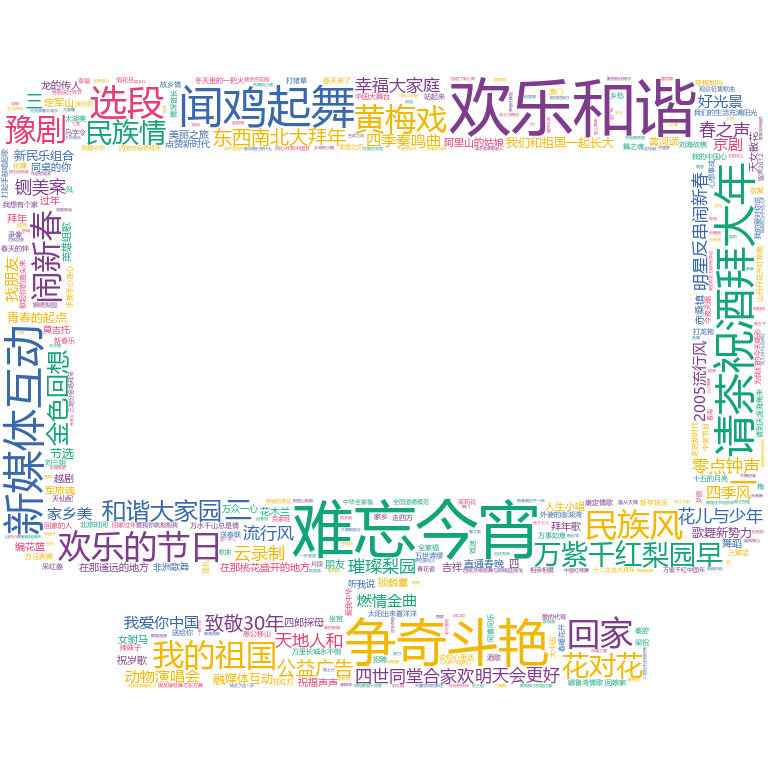

In [126]:
from IPython.display import Image 
import stylecloud

stylecloud.gen_stylecloud(
    text=name,
    collocations=False,
    font_path=r'‪C:\Windows\Fonts\msyh.ttc',
    icon_name='fas fa-tv',
    size=768,
    output_name='../output/节目名称词云图.png'
)

Image(filename='../output./节目名称词云图.png')

# 表演人词云

In [128]:
# 表演人分词处理
jiemu['演出单位/表演者'] =  jiemu['演出单位/表演者'].astype(str)
biaoyan = jiemu['演出单位/表演者'].to_list()
biaoyan = ' '.join(biaoyan)
biaoyan = biaoyan.replace('nan','')
biaoyan

'李谷一 马季、赵炎 马季、赵炎 马季、赵炎 林丽芳（台湾） 索宝莉、牟玄甫 索宝莉、牟玄甫 斯琴高娃、胡松华 胡松华 胡松华 斯琴高娃、严顺开 赵青、徐川 王景愚、姜昆 尹宏伟（第一位参加春晚的儿童演员） 袁世海 姜昆、李文华 姜昆、李文华 姜昆、李文华 姚金芬 上海杂技团 侯耀文、石富宽 马长礼 郑绪岚 郑绪岚 郑绪岚 李维康 刘晓庆 刘晓庆 严顺开 姜昆、马季 严顺开 侯宝林\xa0、郭全宝 李谷一 李谷一 李谷一 李谷一 李谷一 李谷一 李谷一、袁世海、姜昆 李谷一、袁世海 葛春燕 郝志华 王杰 李霞 王建军、于绍文 秦鸣晓、姚金芬 蒋大为 李谷一 于淑珍 苏平 沈小岑 朱明瑛 茅善玉 郭颂 李春来 幼儿园小朋友 解说：姜昆 李文华 马季 李春来 殷秀梅 郭颂 沈小岑 牛得草 游本昌 丁凡 林锦屏 谭元寿 方荣翔 陈佩斯 朱时茂 马兰 王景愚 李辉 朱明瑛 于淑珍 奚秀兰（香港） 袁阔成 表演：李富荣 张燮林 解说：宋世雄 王文娟 表演：现场观众 主持人:黄阿原 姜昆 马季赵炎 蒋大为 李谷一 于淑珍 苏平 沈小岑 朱明瑛 茅善玉 郭颂 苏平 茅善玉 张明敏(香港) 侯伟(6岁) 侯春雪(16岁) 侯树英(54岁) 黄植诚 李大维 黄阿原 陈思思(香港) 姜昆 李文华 蒋大为 李谷一 李谷一 姜昆 李谷一 中国京剧院 湖北省歌舞团 李元华 吕念祖 罗文（香港） 黄阿原主持 周烽 张建一 红线女 王景愚张小卉 马三立 何赛飞\xa0茅威涛 迪里拜尔(维吾尔族) 黄锦波(美国加州喜瑞都市市长) 黄阿原主持 吕念祖\xa0李志秀 陈佩斯\xa0朱时茂 房新华 虎美玲\xa0小香玉\xa0王全真 湖北省歌舞团 董文华柳培德 李登来(武警总队) 奚秀兰(香港) 张明敏(香港) 郝勇 张小燕\xa0赵长军\xa0王建军\xa0王群\xa0李燕龙\xa0邱建国 董岱 姜昆\xa0王金宝 孙岳\xa0王馥荔 汪明荃 黄阿原主持 总政歌舞团 蒋大为彭丽媛 成方圆 蒋大为 郑绪岚牟玄甫 李维康 郁钧剑 彭丽媛 董文华 笑林 刘晓庆姜昆 耿其昌刘斌 刘伟\xa0冯巩 冯京\xa0金云\xa0陈佩斯\xa0朱时茂协助 刘斌\xa0李维康 殷秀梅 成方圆 郁钧剑 成方圆 郭昶(15岁) 笑林李国盛 李婉芬\xa0周国治 夏丽蓉 苏小明 董文华 郑绪岚 牟玄甫 陶长进小香玉方亚芬 沈伐

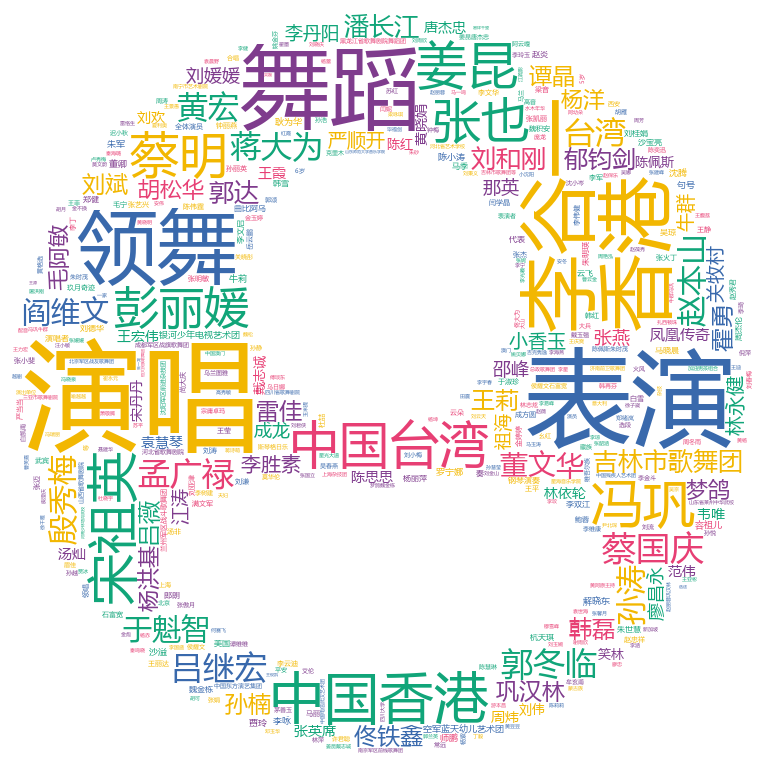

In [131]:
from IPython.display import Image 
import stylecloud

stylecloud.gen_stylecloud(
    text=biaoyan,
    collocations=False,
    font_path=r'‪C:\Windows\Fonts\msyh.ttc',
    icon_name='fas fa-user-circle',
    size=768,
    output_name='../output/表演人词云图.png'
)

Image(filename='../output./表演人词云图.png')